In [34]:
import sys
import os
import streamlit as st
import requests
import pandas as pd
import datetime as datetime
import matplotlib.pyplot as plt
import tempfile
import sqlite3
import numpy as np
import seaborn as sns

from budget_functions import *

# # Was hoping to put the site online...
# script_directory = os.path.dirname(os.path.abspath(__file__))
# # Add the project root directory to sys.path
# project_root_directory = os.path.join(script_directory, '..')
# sys.path.append(project_root_directory)


In [2]:
master = create_master("raw_data/clevmoney_102423_125727_auto.db")


In [3]:
master


,s_date,s_time,s_where,s_cate,s_subcate,s_price,Month,Year
0,2022-05-02,15:13:00,Tesco,Groceries,Tesco,9.70,5,2022
1,2022-05-02,15:14:00,Santander,Transportation,Bicycle,90.00,5,2022
2,2022-05-03,15:37:00,Tesco,Food,Snacks,3.20,5,2022
3,2022-05-03,22:19:00,RyanAir (Amsterdam),Holidays,Flights,90.82,5,2022
4,2022-05-03,22:19:00,EasyJet (Poland),Holidays,Flights,126.66,5,2022
...,...,...,...,...,...,...,...,...
1669,2023-10-21,15:50:00,Runners Needs,Shopping,Clothes,29.99,10,2023
1670,2023-10-21,15:53:00,Sainsbury,Groceries,Sainsbury,13.20,10,2023
1671,2023-10-21,19:03:00,Runners Needs,Shopping,Clothes,180.00,10,2023
1672,2023-10-21,00:00:00,Roman Road,Groceries,Roman Road,1.74,10,2023


In [4]:
raw_avg, len_of_time = mnth_avg(master)
raw_avg.columns


Index(['s_cate', 0], dtype='object')

Text(0.5, 1.0, 'Average spend over 20 months')

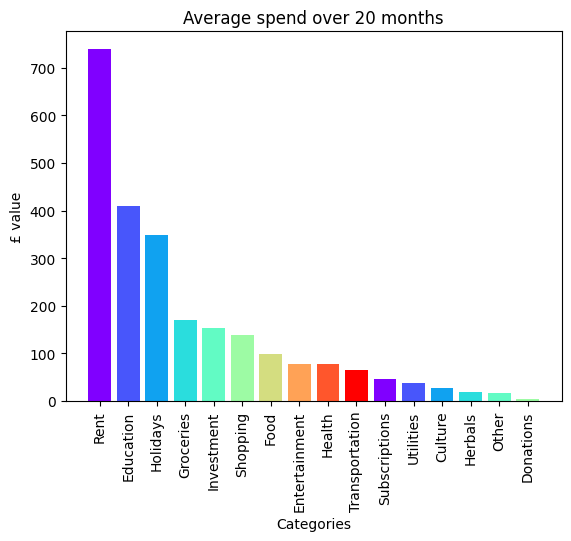

In [5]:
norm = plt.Normalize(0.5, 0.75)

x = np.arange(10)
y = np.random.rand(10)

cmap = plt.cm.get_cmap('rainbow')

plt.bar(raw_avg['s_cate'], raw_avg[0], color=cmap(np.linspace(0, 1, len(x))))
plt.xlabel("Categories")
plt.xticks(rotation=90)
plt.ylabel('£ value')
plt.title(f"Average spend over {len_of_time} months")


# Next things to do

1. Add weekly spend overlay to the Monthly totals graph - perhaps do this as violin plots? Kinda like crypto graphs
2. Be able to create your own categories
3. Be able to look into sub categories


In [16]:
master['s_cate'].unique()

all_cats = [     'Groceries', 'Transportation',           'Food',       'Holidays',
  'Entertainment',          'Other',      'Education',        'Culture',
  'Subscriptions',         'Health',       'Shopping',           'Rent',
        'Herbals',     'Investment',      'Donations',      'Utilities']

subcats = [     'Groceries', 'Transportation',       'Food',   'Holidays',
  'Entertainment',      'Other',    'Culture',
  'Subscriptions',     'Health',   'Shopping', 'Herbals',  'Donations',  'Utilities']


In [18]:
subcate_mask = master['s_cate'].isin(subcats)
master[subcate_mask]


,s_date,s_time,s_where,s_cate,s_subcate,s_price,Month,Year,week_num
0,2022-05-02,15:13:00,Tesco,Groceries,Tesco,9.70,5,2022,"(2022, 18)"
1,2022-05-02,15:14:00,Santander,Transportation,Bicycle,90.00,5,2022,"(2022, 18)"
2,2022-05-03,15:37:00,Tesco,Food,Snacks,3.20,5,2022,"(2022, 18)"
3,2022-05-03,22:19:00,RyanAir (Amsterdam),Holidays,Flights,90.82,5,2022,"(2022, 18)"
4,2022-05-03,22:19:00,EasyJet (Poland),Holidays,Flights,126.66,5,2022,"(2022, 18)"
...,...,...,...,...,...,...,...,...,...
1669,2023-10-21,15:50:00,Runners Needs,Shopping,Clothes,29.99,10,2023,"(2023, 42)"
1670,2023-10-21,15:53:00,Sainsbury,Groceries,Sainsbury,13.20,10,2023,"(2023, 42)"
1671,2023-10-21,19:03:00,Runners Needs,Shopping,Clothes,180.00,10,2023,"(2023, 42)"
1672,2023-10-21,00:00:00,Roman Road,Groceries,Roman Road,1.74,10,2023,"(2023, 42)"


In [6]:
master


,s_date,s_time,s_where,s_cate,s_subcate,s_price,Month,Year
0,2022-05-02,15:13:00,Tesco,Groceries,Tesco,9.70,5,2022
1,2022-05-02,15:14:00,Santander,Transportation,Bicycle,90.00,5,2022
2,2022-05-03,15:37:00,Tesco,Food,Snacks,3.20,5,2022
3,2022-05-03,22:19:00,RyanAir (Amsterdam),Holidays,Flights,90.82,5,2022
4,2022-05-03,22:19:00,EasyJet (Poland),Holidays,Flights,126.66,5,2022
...,...,...,...,...,...,...,...,...
1669,2023-10-21,15:50:00,Runners Needs,Shopping,Clothes,29.99,10,2023
1670,2023-10-21,15:53:00,Sainsbury,Groceries,Sainsbury,13.20,10,2023
1671,2023-10-21,19:03:00,Runners Needs,Shopping,Clothes,180.00,10,2023
1672,2023-10-21,00:00:00,Roman Road,Groceries,Roman Road,1.74,10,2023


In [7]:
master['s_date'][0].isocalendar()[:2]


(2022, 18)

In [8]:
master['week_num'] = master['s_date'].apply(lambda x: x.isocalendar()[:2])


In [9]:
master


,s_date,s_time,s_where,s_cate,s_subcate,s_price,Month,Year,week_num
0,2022-05-02,15:13:00,Tesco,Groceries,Tesco,9.70,5,2022,"(2022, 18)"
1,2022-05-02,15:14:00,Santander,Transportation,Bicycle,90.00,5,2022,"(2022, 18)"
2,2022-05-03,15:37:00,Tesco,Food,Snacks,3.20,5,2022,"(2022, 18)"
3,2022-05-03,22:19:00,RyanAir (Amsterdam),Holidays,Flights,90.82,5,2022,"(2022, 18)"
4,2022-05-03,22:19:00,EasyJet (Poland),Holidays,Flights,126.66,5,2022,"(2022, 18)"
...,...,...,...,...,...,...,...,...,...
1669,2023-10-21,15:50:00,Runners Needs,Shopping,Clothes,29.99,10,2023,"(2023, 42)"
1670,2023-10-21,15:53:00,Sainsbury,Groceries,Sainsbury,13.20,10,2023,"(2023, 42)"
1671,2023-10-21,19:03:00,Runners Needs,Shopping,Clothes,180.00,10,2023,"(2023, 42)"
1672,2023-10-21,00:00:00,Roman Road,Groceries,Roman Road,1.74,10,2023,"(2023, 42)"


<AxesSubplot: xlabel='week_num'>

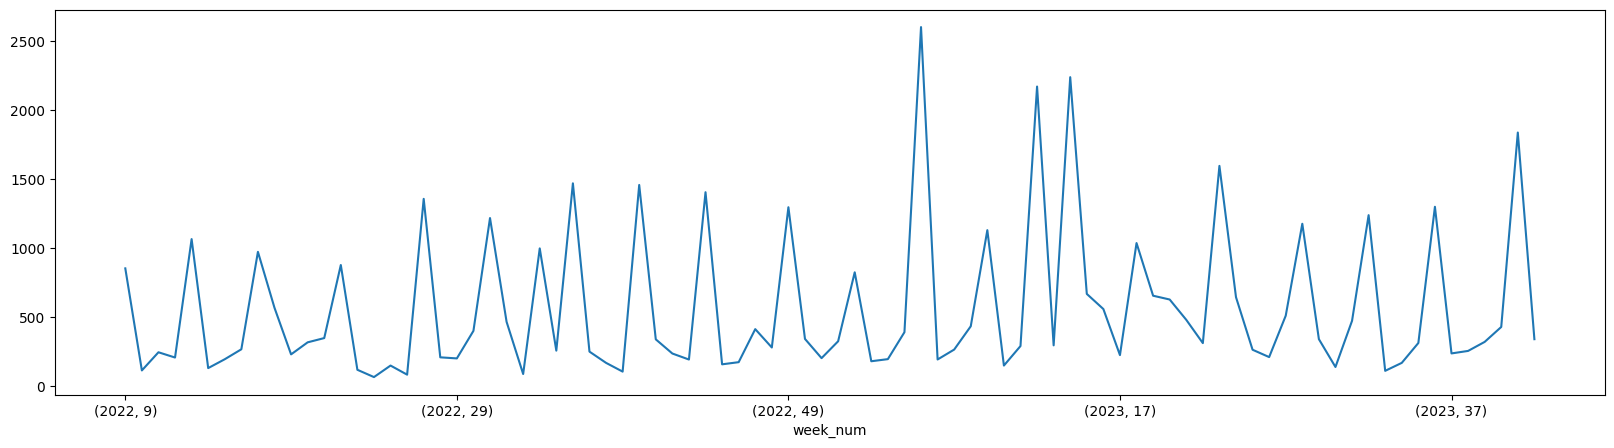

In [13]:
master.groupby('week_num')['s_price'].sum().plot(figsize=(20,5))


<AxesSubplot: xlabel='week_num'>

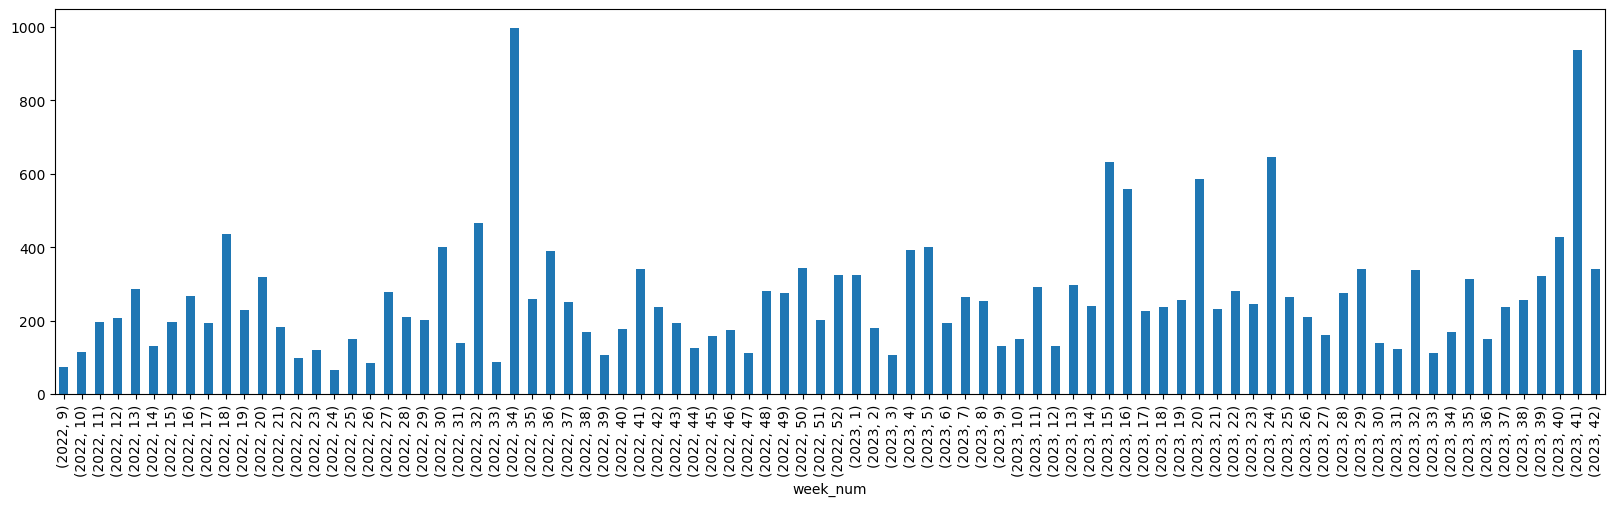

In [23]:
master[subcate_mask].groupby('week_num')['s_price'].sum().plot(kind='bar', stacked=True, figsize=(20,5))


<AxesSubplot: xlabel='week_num'>

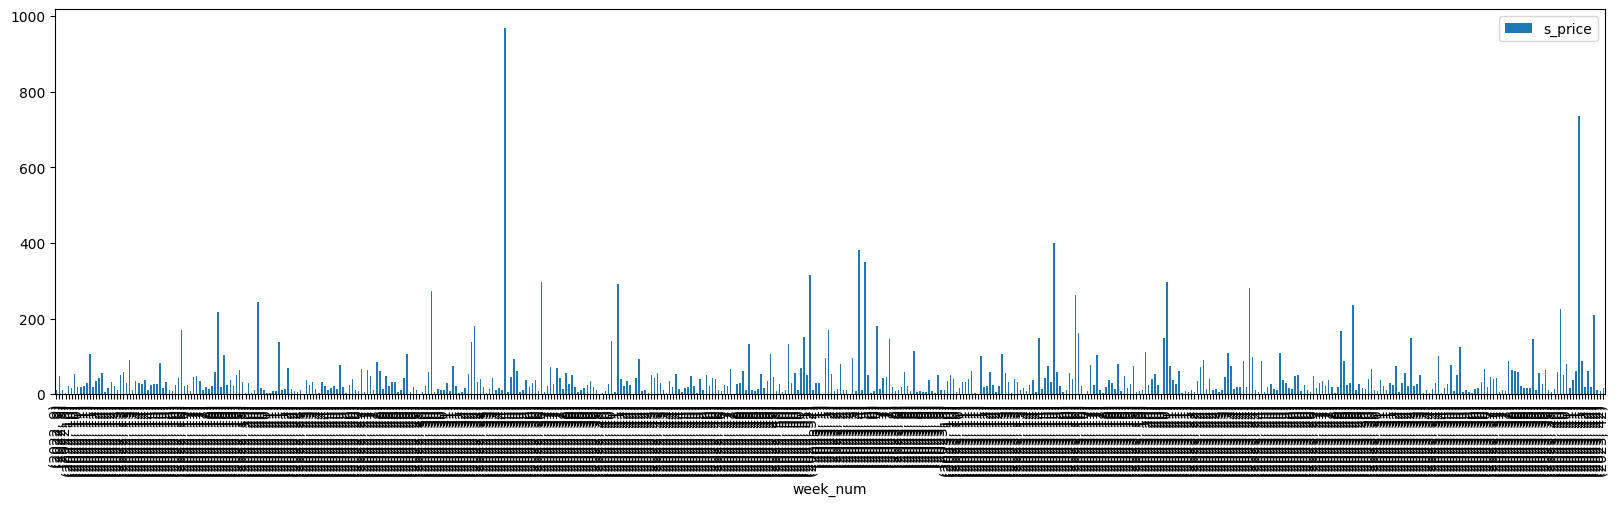

In [33]:
pd.DataFrame(master[subcate_mask].groupby(['week_num', 's_cate'])['s_price'].sum()).reset_index().set_index('week_num').plot(kind='bar', stacked=True, figsize=(20,5))


In [80]:
temp_data = pd.DataFrame(master[subcate_mask].groupby(['week_num', 's_cate'])['s_price'].sum()).reset_index()


In [81]:
temp_data


,week_num,s_cate,s_price
0,"(2022, 9)",Entertainment,11.40
1,"(2022, 9)",Groceries,48.84
2,"(2022, 9)",Subscriptions,10.00
3,"(2022, 9)",Transportation,3.50
4,"(2022, 10)",Entertainment,22.96
...,...,...,...
503,"(2023, 42)",Health,18.95
504,"(2023, 42)",Shopping,209.99
505,"(2023, 42)",Subscriptions,10.00
506,"(2023, 42)",Transportation,7.30


In [71]:
temp_data['week_num'].unique()


array([(2022, 9), (2022, 10), (2022, 11), (2022, 12), (2022, 13),
       (2022, 14), (2022, 15), (2022, 16), (2022, 17), (2022, 18),
       (2022, 19), (2022, 20), (2022, 21), (2022, 22), (2022, 23),
       (2022, 24), (2022, 25), (2022, 26), (2022, 27), (2022, 28),
       (2022, 29), (2022, 30), (2022, 31), (2022, 32), (2022, 33),
       (2022, 34), (2022, 35), (2022, 36), (2022, 37), (2022, 38),
       (2022, 39), (2022, 40), (2022, 41), (2022, 42), (2022, 43),
       (2022, 44), (2022, 45), (2022, 46), (2022, 47), (2022, 48),
       (2022, 49), (2022, 50), (2022, 51), (2022, 52), (2023, 1),
       (2023, 2), (2023, 3), (2023, 4), (2023, 5), (2023, 6), (2023, 7),
       (2023, 8), (2023, 9), (2023, 10), (2023, 11), (2023, 12),
       (2023, 13), (2023, 14), (2023, 15), (2023, 16), (2023, 17),
       (2023, 18), (2023, 19), (2023, 20), (2023, 21), (2023, 22),
       (2023, 23), (2023, 24), (2023, 25), (2023, 26), (2023, 27),
       (2023, 28), (2023, 29), (2023, 30), (2023, 31), (2023

In [64]:

temp_data['week_num'] = temp_data['week_num'].apply(lambda x: f"{x[0]}-{x[1]}")


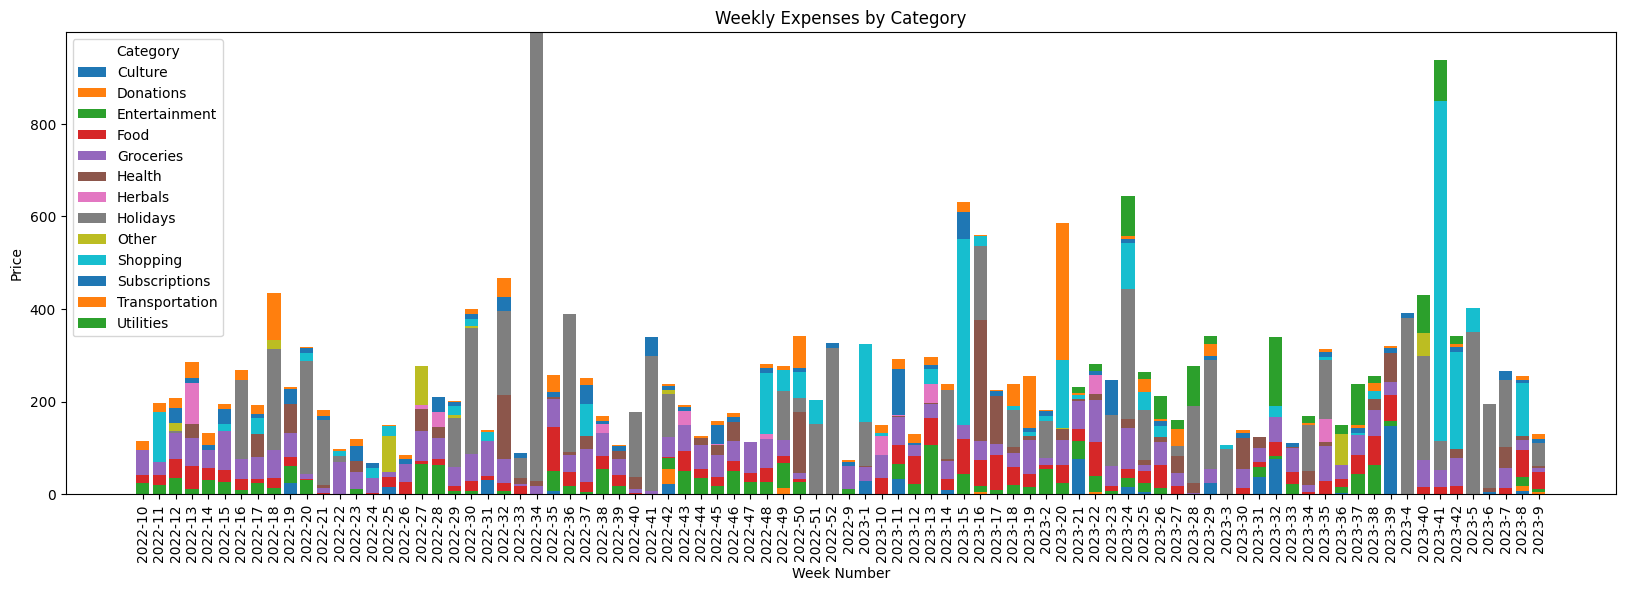

In [65]:
pivot_df = temp_data.pivot_table(values='s_price', index='week_num', columns='s_cate', aggfunc='sum', fill_value=0)

pivot_df

# Plot stacked bars
bottom = np.zeros(len(pivot_df))

plt.subplots(figsize=(20,6))
for column in pivot_df.columns:
    plt.bar(pivot_df.index, pivot_df[column], bottom=bottom, label=column)
    bottom += pivot_df[column].values

# Add labels and legend
plt.xlabel('Week Number')
plt.xticks(rotation=90)
plt.ylabel('Price')
plt.title('Weekly Expenses by Category')
plt.legend(title='Category')

plt.show()


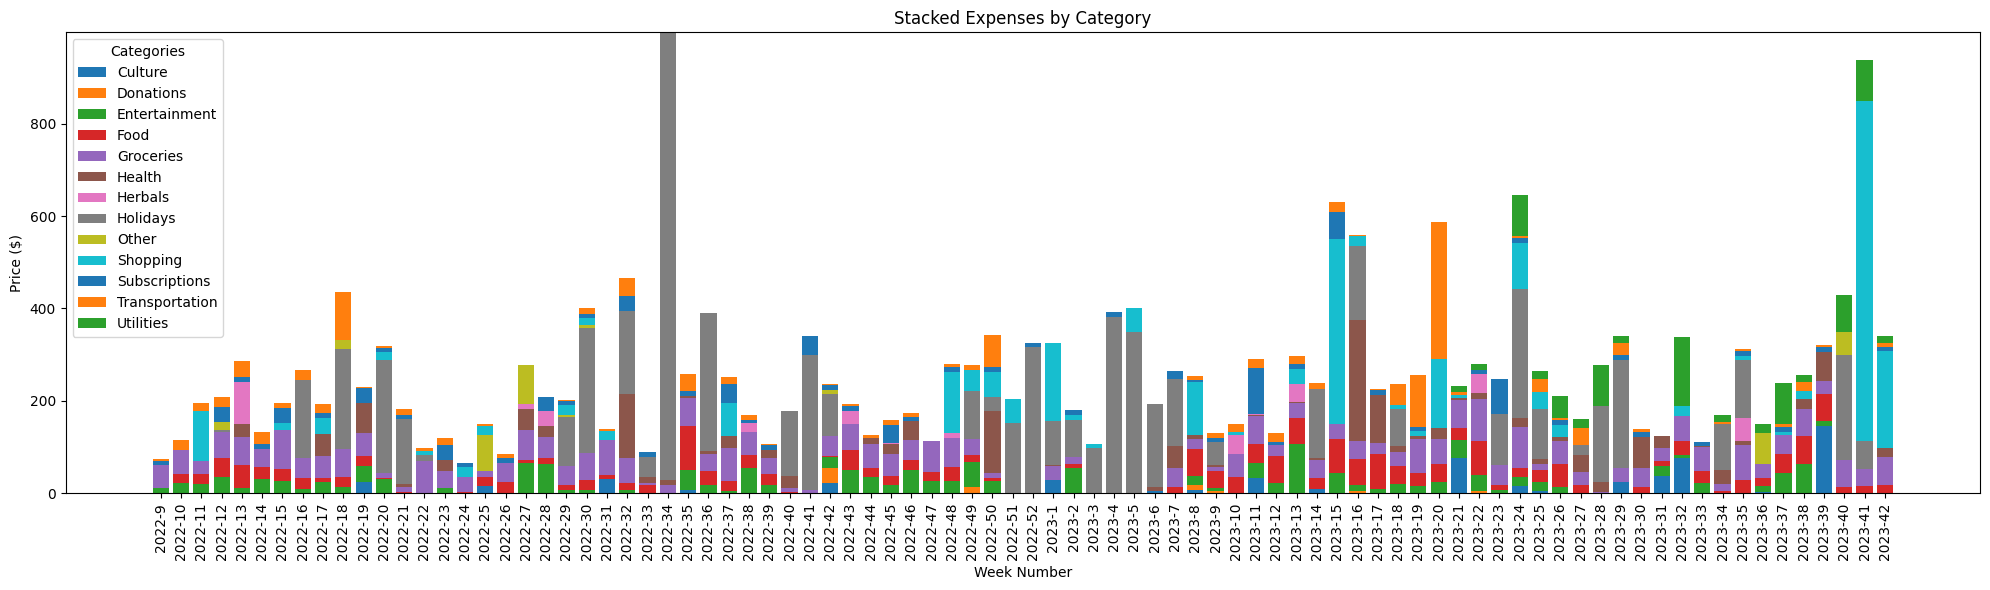

In [79]:
temp_data['week_label'] = temp_data['week_num'].apply(lambda x: f"{x[0]}-{x[1]}")

# Create a mapping for the week_num to maintain ordinality
week_mapping = {week: i for i, week in enumerate(temp_data['week_label'].unique())}
temp_data['week_mapped'] = temp_data['week_label'].map(week_mapping)

# Pivot the DataFrame
pivot_df = temp_data.pivot_table(values='s_price', index='week_mapped', columns='s_cate', aggfunc='sum', fill_value=0)

# Initialize the bottom array
bottom = np.zeros(len(pivot_df))

# Plot
fig, ax = plt.subplots(figsize=(20, 6))  # You can adjust the figure size here
week_labels = [f'{week}' for week in sorted(week_mapping, key=week_mapping.get)]
for cate in pivot_df.columns:
    ax.bar(pivot_df.index, pivot_df[cate], bottom=bottom, label=cate)
    bottom += pivot_df[cate].values

# Set the x-axis labels to the sorted week numbers
ax.set_xticks(range(len(week_labels)))
ax.set_xticklabels(week_labels, rotation=45)  # Rotate labels for better readability

# Labeling
plt.xlabel('Week Number')
plt.xticks(rotation=90)

plt.ylabel('Price ($)')
plt.title('Stacked Expenses by Category')
plt.legend(title='Categories')
plt.tight_layout()

# Show plot
plt.show()
